In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy as sc
import urllib.request

In [ ]:
#Datos iniciales
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

In [ ]:
#Diccionario que almacena los datos proporcionados
dicc={"x":x,"y":y}

In [ ]:
#Uso de pandas para organizar los datos en una tabla
df = pd.DataFrame(dicc)

In [ ]:
df

,x,y
0,0.9,1.30
1,1.3,1.50
2,1.9,1.85
3,2.1,2.10
4,2.6,2.60
5,3.0,2.70
6,3.9,2.40
7,4.4,2.15
8,4.7,2.05
9,5.0,2.10


In [ ]:
Url='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png'
Url

'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png'

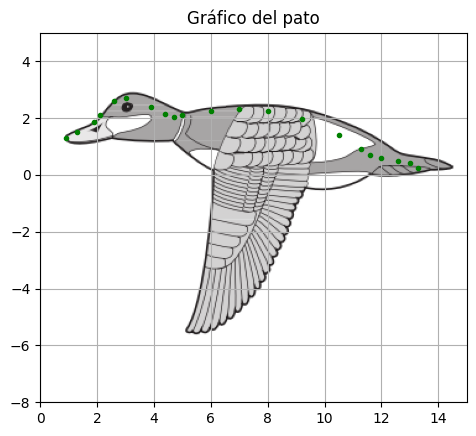

In [ ]:
#Representación gráfica de la imagen
urllib.request.urlretrieve(Url,"pato.png")
imagen=plt.imread("pato.png")

#Mostar la representación gráfica
plt.figure()
plt.title("Gráfico del pato")
plt.imshow(imagen,extent=(0.5,15,-6,3.4))
plt.plot(df["x"],df["y"],".g")
plt.xlim(0,15)
plt.ylim(-8,5)
plt.grid(True)
plt.show()

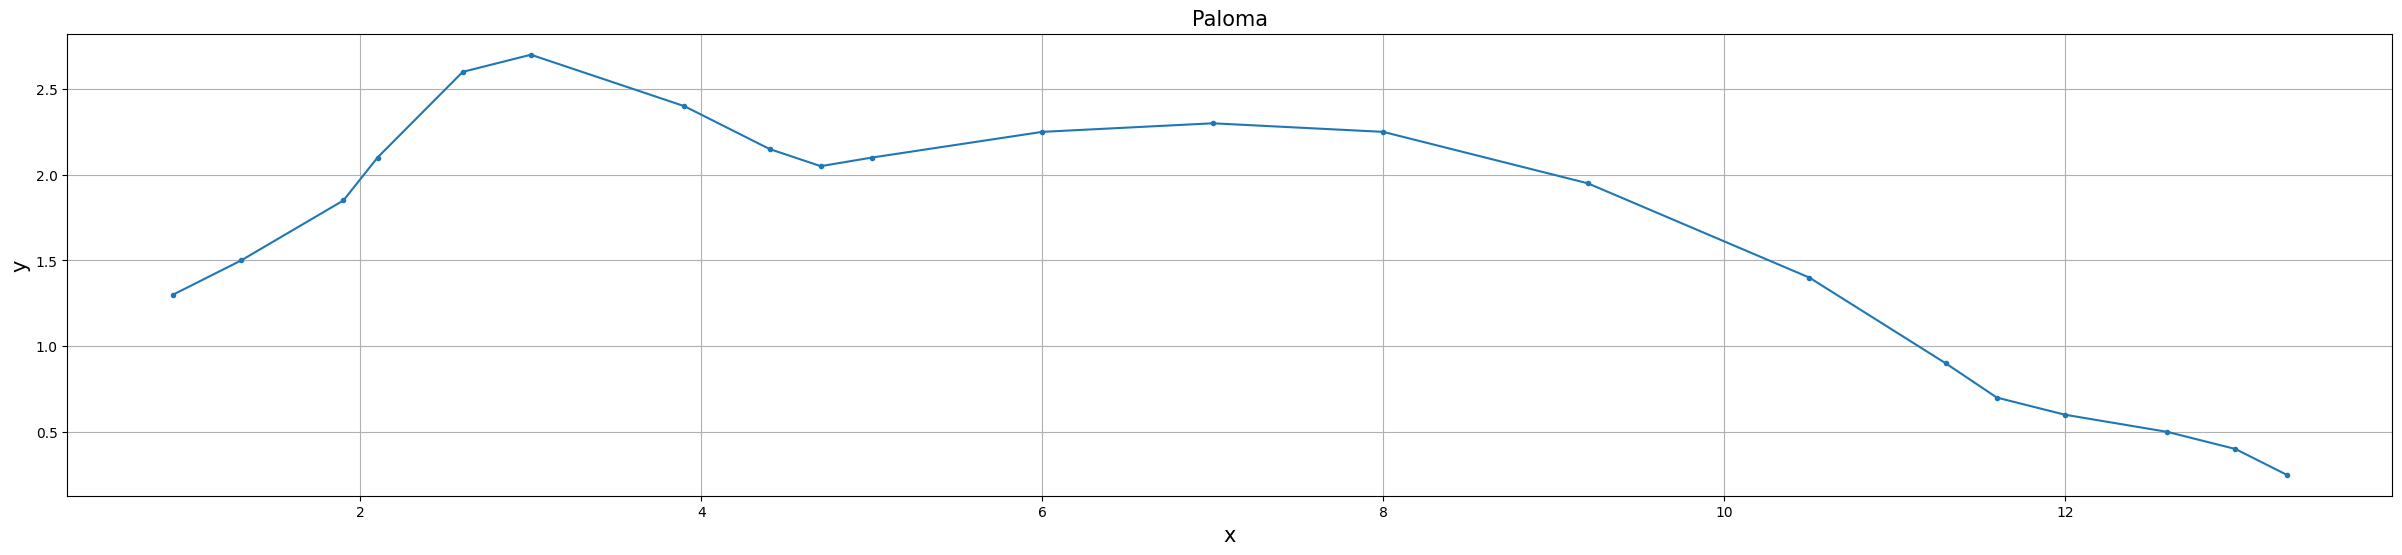

In [ ]:
#Mostrar solo la superficie superior del pato
plt.figure(figsize=(30,6))
plt.plot(df["x"],df["y"],".-")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.title("Paloma",fontsize=15)
plt.grid(True)
plt.show()

Aplicando interpolación de lagrange

Polinomio de Lagrange

In [ ]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

In [ ]:
dicc={"x":x,"y":y}
df = pd.DataFrame(dicc)
p=sc.interpolate.lagrange(x,y)
x_=np.linspace(min(x),max(x))
y_=p(x_)

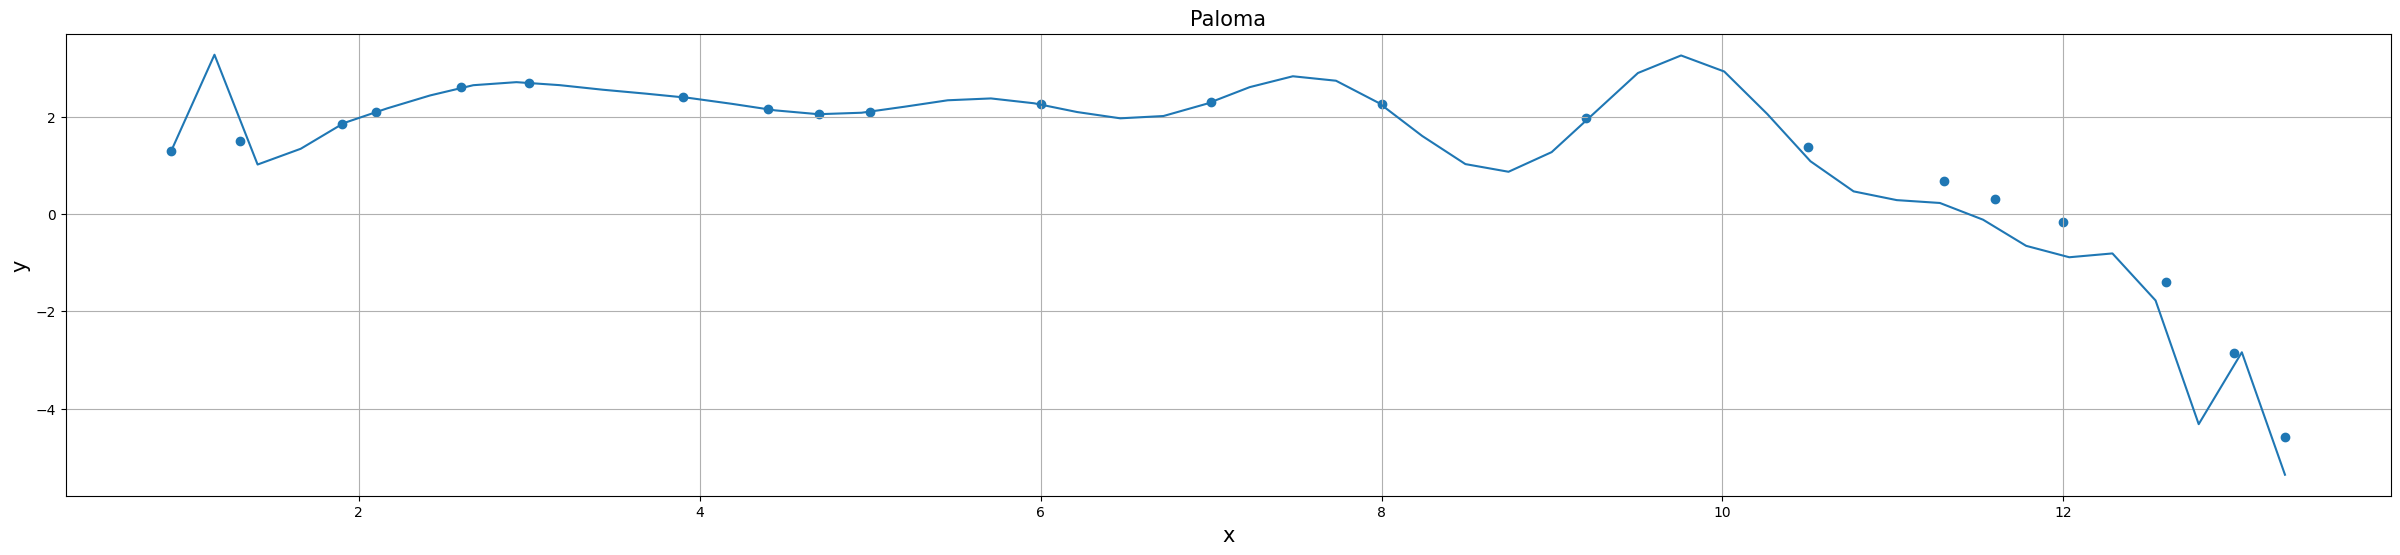

In [ ]:
plt.figure(figsize=(30,6))
plt.scatter(df["x"],df["y"])
plt.plot(x_,y_)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.title("Paloma",fontsize=15)
plt.grid(True)
plt.show()

Polinomio bajo el método de de CubicSpline

In [ ]:
p_c=sc.interpolate.CubicSpline(x,y)
p_x=x_=np.linspace(min(x),max(x))
p_y=p_c(p_x)

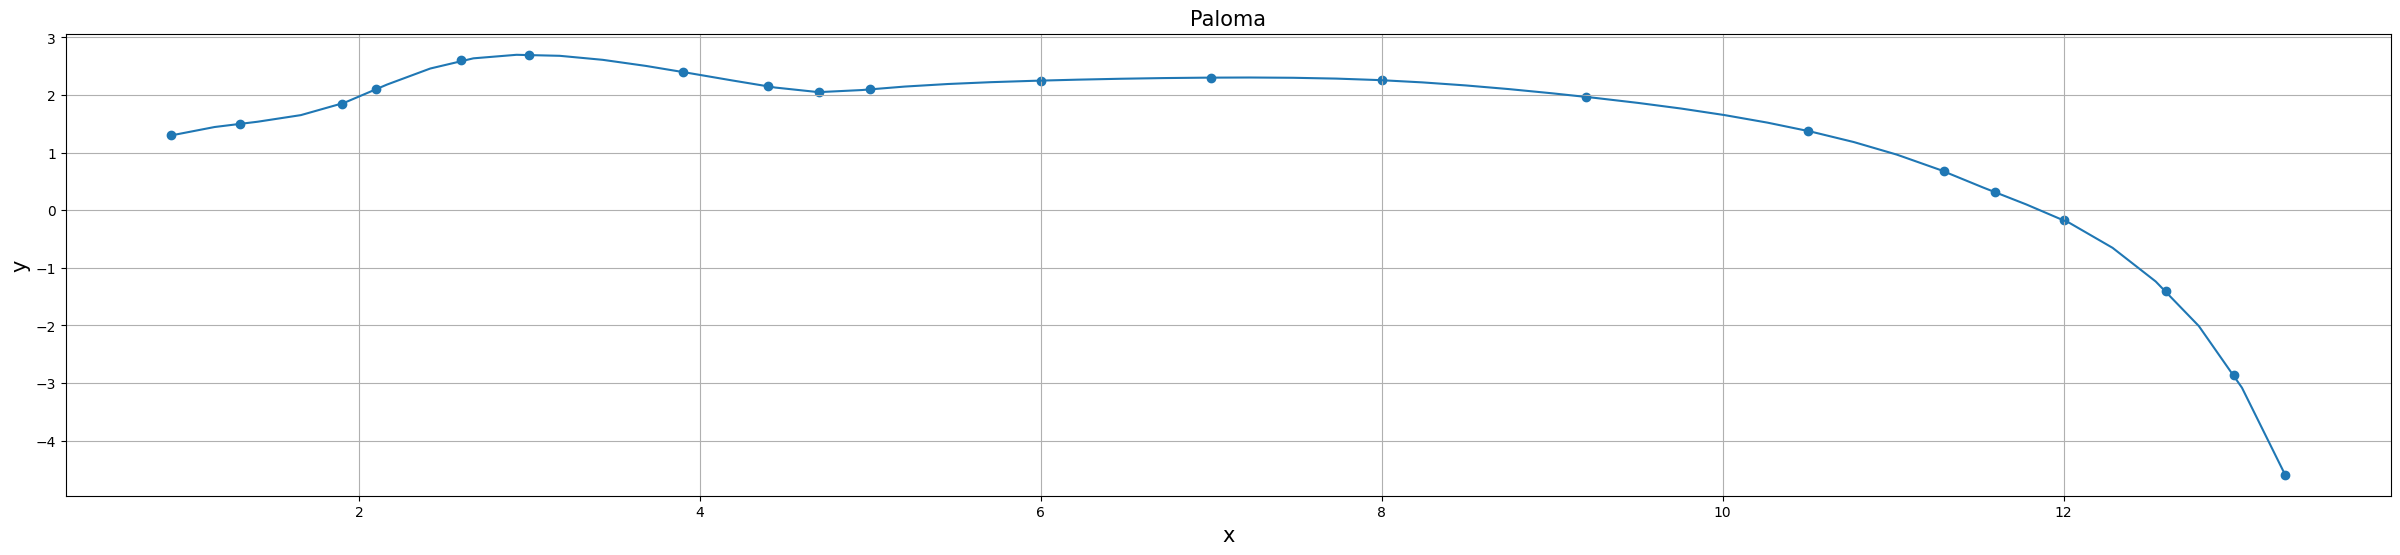

In [ ]:
plt.figure(figsize=(30,6))
plt.scatter(df["x"],df["y"])
plt.plot(p_x,p_y)
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.title("Paloma",fontsize=15)
plt.grid(True)
plt.show()

Polinomio de CubicHermiteSpline

In [ ]:
#Método que utiliza diferenciales
m=np.diff(y)/np.diff(x)

In [ ]:
#Elimine un punto, elimine el primero en este caso
x_=np.delete(x,0)
y_=np.delete(y,0)
p_chs=sc.interpolate.CubicHermiteSpline(x_,y_,m)

In [ ]:
p_chs=sc.interpolate.CubicHermiteSpline(x_,y_,m)
intervalo_x_=np.linspace(min(x_),max(x_),1000)

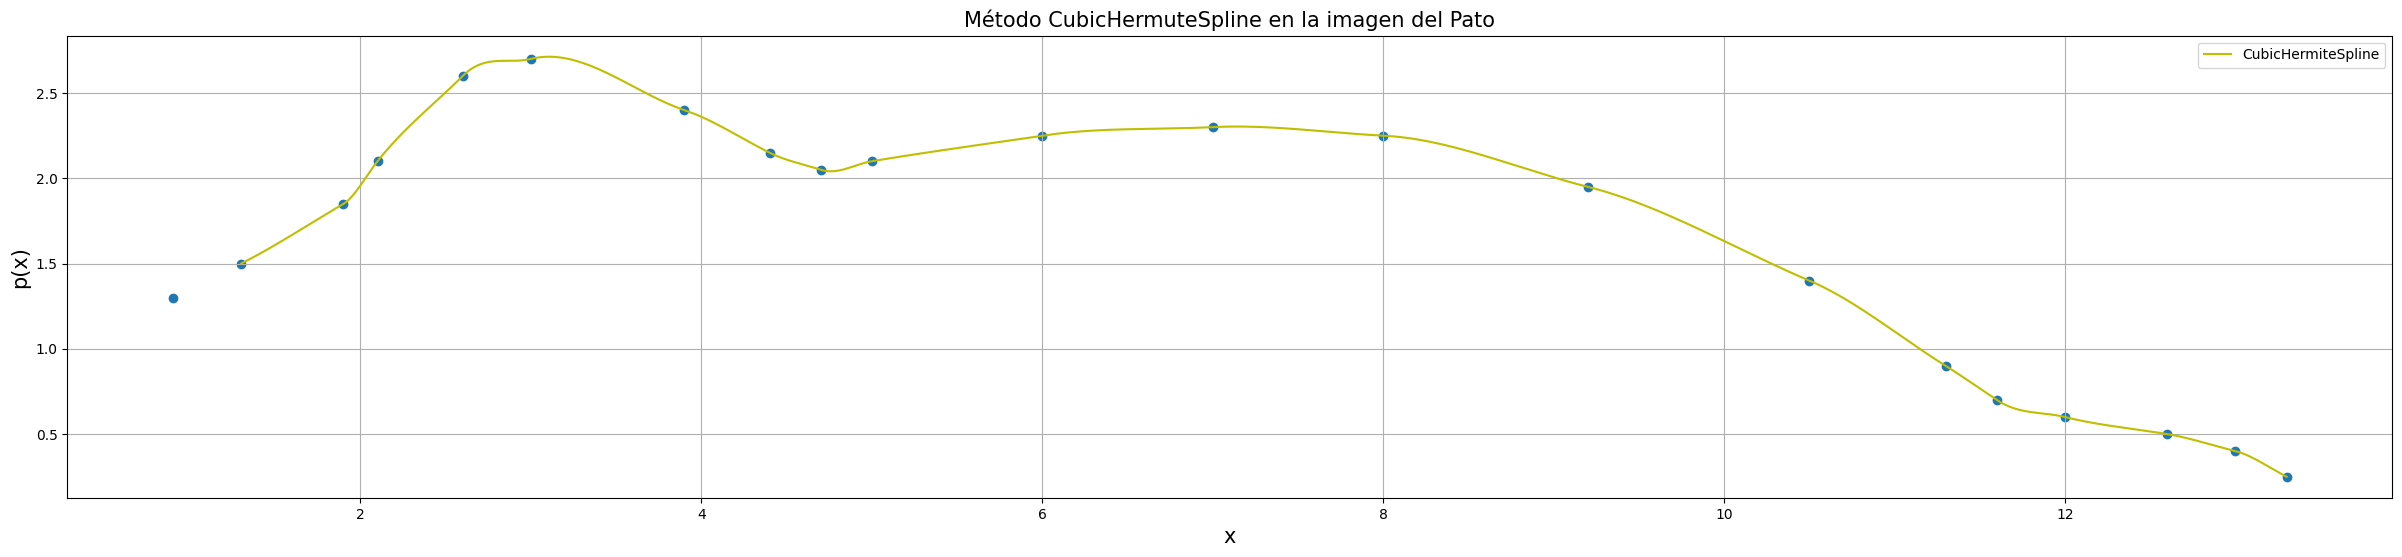

In [ ]:
#Gráfico
plt.figure(figsize=(30,6))
plt.scatter(df["x"],df["y"])
plt.plot(intervalo_x_,p_chs(intervalo_x_),"y",label=("CubicHermiteSpline"))
plt.xlabel("x",fontsize=15)
plt.ylabel("p(x)",fontsize=15)
plt.title("Método CubicHermuteSpline en la imagen del Pato",fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

Comparaciones de los diferentes métodos

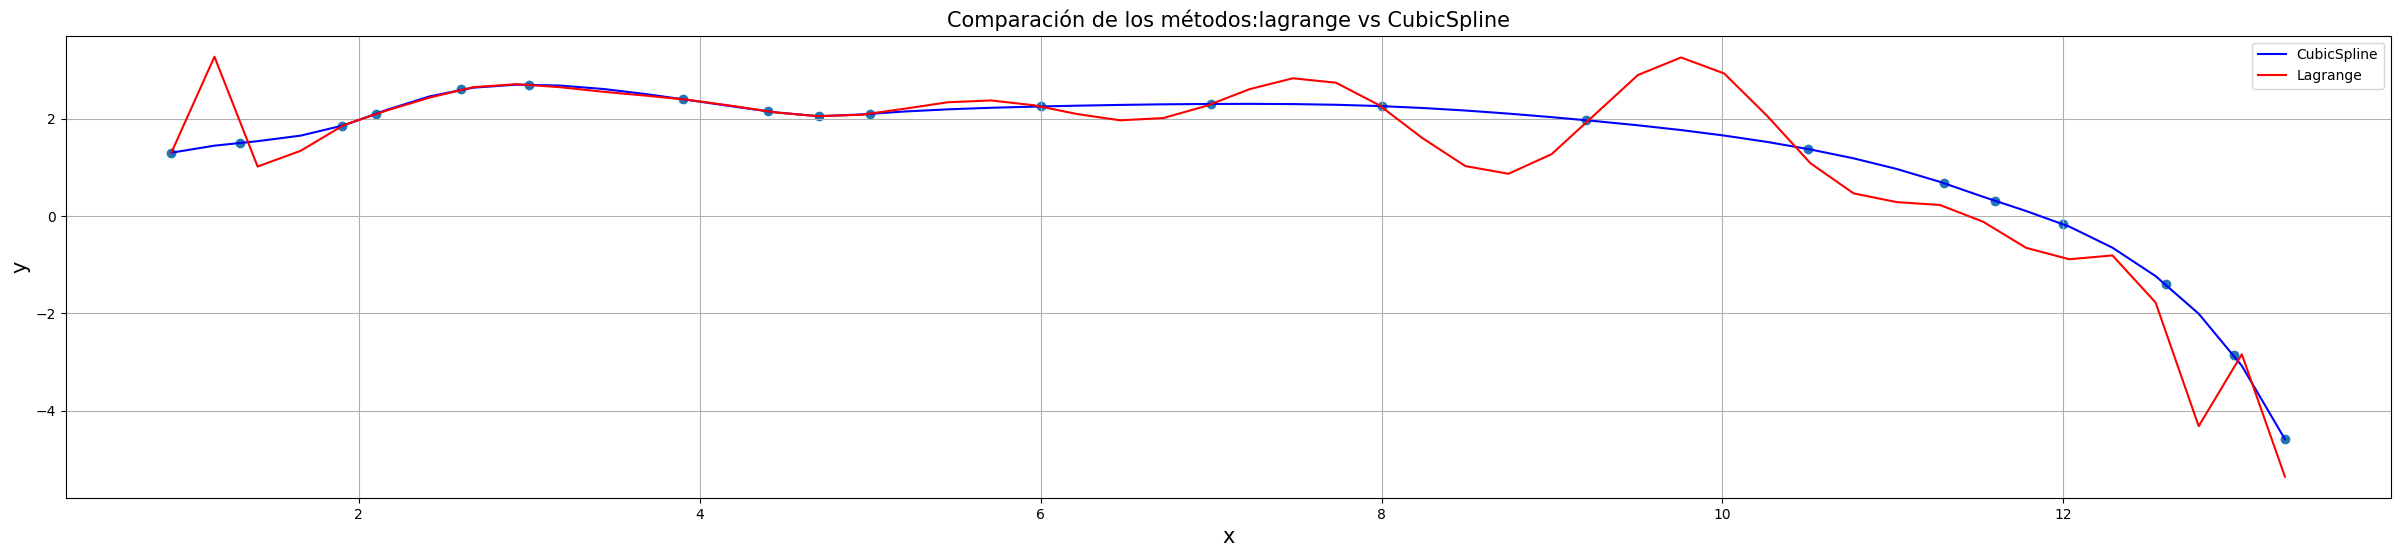

In [ ]:
#Comparación de los dos métodos Lagrange vs CubicSpline
plt.figure(figsize=(30,6))
plt.scatter(df["x"],df["y"])
plt.plot(p_x,p_y, label="CubicSpline",color="b")
plt.plot(x_,y_, label="Lagrange",color="r")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.title("Comparación de los métodos:lagrange vs CubicSpline",fontsize=15)
plt.grid(True)
plt.show()

Comparación de los tres métodos

In [ ]:
x=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
y=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

In [ ]:
dicc={"x":x,"y":y}
df = pd.DataFrame(dicc)
p=sc.interpolate.lagrange(x,y)

In [ ]:
p_c=sc.interpolate.CubicSpline(x,y)
p_c(x),p_c(y)

(array([1.3 , 1.5 , 1.85, 2.1 , 2.6 , 2.7 , 2.4 , 2.15, 2.05, 2.1 , 2.25,
        2.3 , 2.25, 1.95, 1.4 , 0.9 , 0.7 , 0.6 , 0.5 , 0.4 , 0.25]),
 array([1.5       , 1.57287422, 1.79833519, 2.1       , 2.6       ,
        2.64948073, 2.44317436, 2.16361153, 2.03491583, 2.1       ,
        2.28416717, 2.34042358, 2.28416717, 1.90782375, 1.53483032,
        1.3       , 1.09862266, 0.95634712, 0.78015938, 0.5654187 ,
        0.16086937]))

In [ ]:
p_chs=sc.interpolate.CubicSpline(x,y)
p_chs(x),p_chs(y)

(array([1.3 , 1.5 , 1.85, 2.1 , 2.6 , 2.7 , 2.4 , 2.15, 2.05, 2.1 , 2.25,
        2.3 , 2.25, 1.95, 1.4 , 0.9 , 0.7 , 0.6 , 0.5 , 0.4 , 0.25]),
 array([1.5       , 1.57287422, 1.79833519, 2.1       , 2.6       ,
        2.64948073, 2.44317436, 2.16361153, 2.03491583, 2.1       ,
        2.28416717, 2.34042358, 2.28416717, 1.90782375, 1.53483032,
        1.3       , 1.09862266, 0.95634712, 0.78015938, 0.5654187 ,
        0.16086937]))

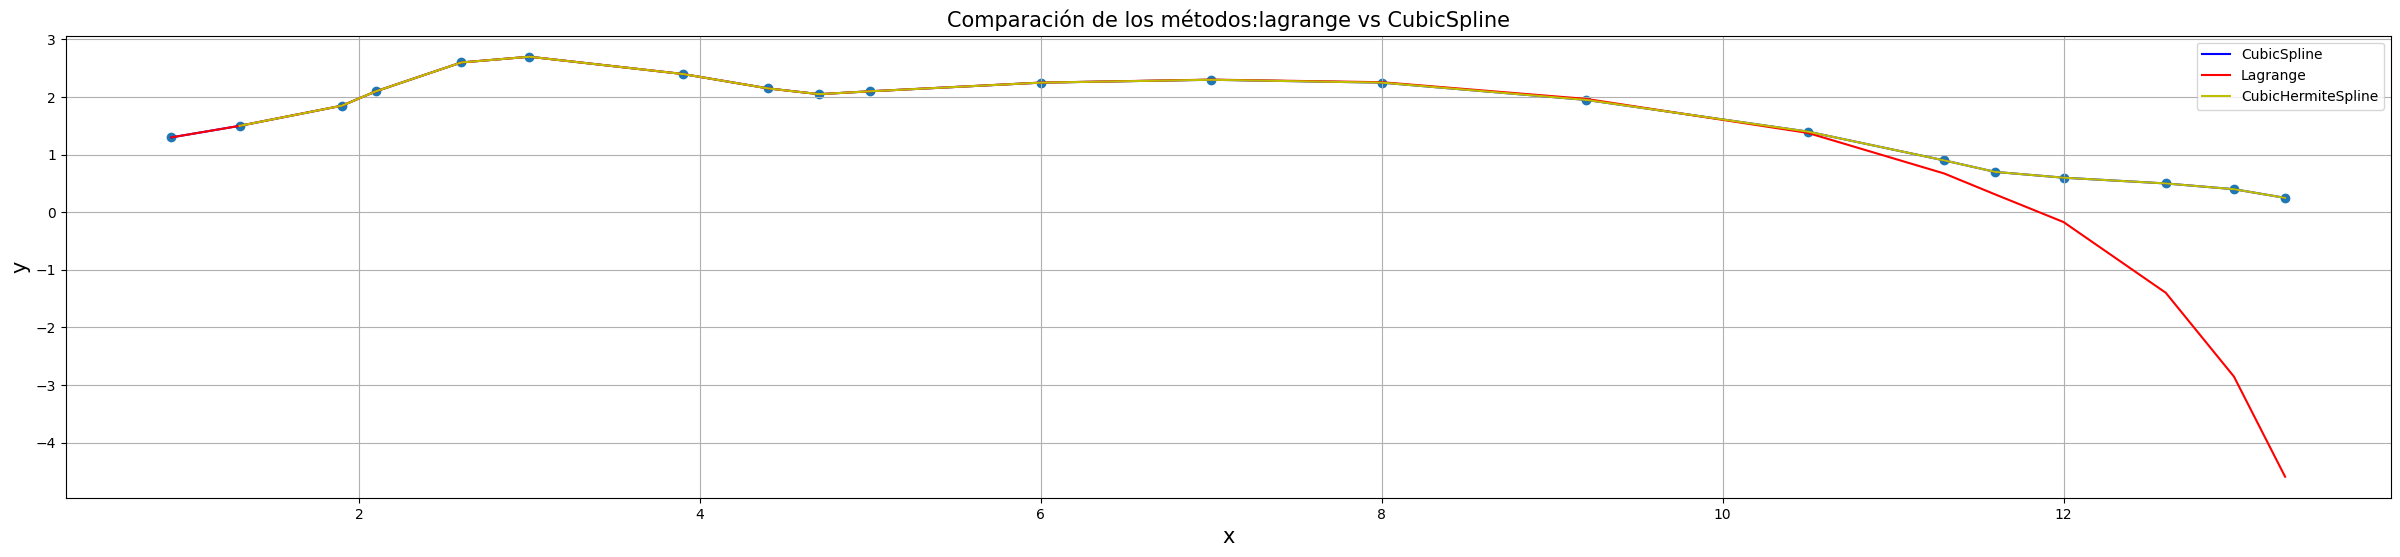

In [ ]:
plt.figure(figsize=(30,6))
plt.scatter(df["x"],df["y"])
plt.plot(x,p_c(x), label="CubicSpline",color="b")
plt.plot(x,p(x), label="Lagrange",color="r")
plt.plot(x_,p_chs(x_), label="CubicHermiteSpline",color="y")
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.legend()
plt.title("Comparación de los métodos:lagrange vs CubicSpline",fontsize=15)
plt.grid(True)
plt.show()